<a href="https://colab.research.google.com/github/NayeonKimdev/math-for-ml/blob/main/01_linear_algebra/02_matrix_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧮 Matrix Operations: The Building Blocks of Machine Learning

## 🎯 Learning Objectives
By the end of this notebook, you will:
- Understand matrix multiplication and its geometric interpretation
- Master matrix inverses and their applications in ML
- Compute determinants and understand their significance
- Apply matrix operations to solve real ML problems
- Visualize matrix transformations interactively

## 🚀 Why This Matters for ML
Matrix operations are everywhere in machine learning:
- **Neural Networks**: Forward/backward propagation
- **Computer Vision**: Image transformations, convolutions
- **Optimization**: Gradient computations, Hessians
- **Dimensionality Reduction**: PCA, SVD
- **Linear Models**: Least squares, regularization


## Setup Environment

In [ ]:
# 📦 Setup: Install required packages
!pip install numpy matplotlib plotly seaborn ipywidgets -q

# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from ipywidgets import interact, FloatSlider, IntSlider
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")

print("🎉 Environment setup complete! Ready to explore matrix operations.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00
🎉 Environment setup complete! Ready to explore matrix operations.


In [ ]:
!jupyter nbextension enable --py widgetsnbextension
from google.colab import output
output.enable_custom_widget_manager()

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## 1. 📐 Matrix Fundamentals

### What is a Matrix?
A matrix is a rectangular array of numbers arranged in rows and columns. In machine learning, matrices represent:
- **Data**: Each row is a sample, each column is a feature
- **Weights**: Neural network parameters
- **Transformations**: Rotations, scalings, projections

### Mathematical Definition
An $m \times n$ matrix $\mathbf{A}$ has $m$ rows and $n$ columns:

$$\mathbf{A} = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}$$

### Key Properties
- **Shape**: $(m, n)$ where $m$ = rows, $n$ = columns
- **Elements**: $a_{ij}$ is the element in row $i$, column $j$
- **Square Matrix**: $m = n$
- **Vector**: Matrix with one column $(n, 1)$ or one row $(1, n)$

### 🔍 Matrix Examples and Visualization

Matrix A (2×3):
[[1 2 3]
 [4 5 6]]

Shape of A: (2, 3)

Matrix B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]

Matrix C (3×3 - Square):
[[1 2 3]
 [4 5 6]
 [7 8 9]]


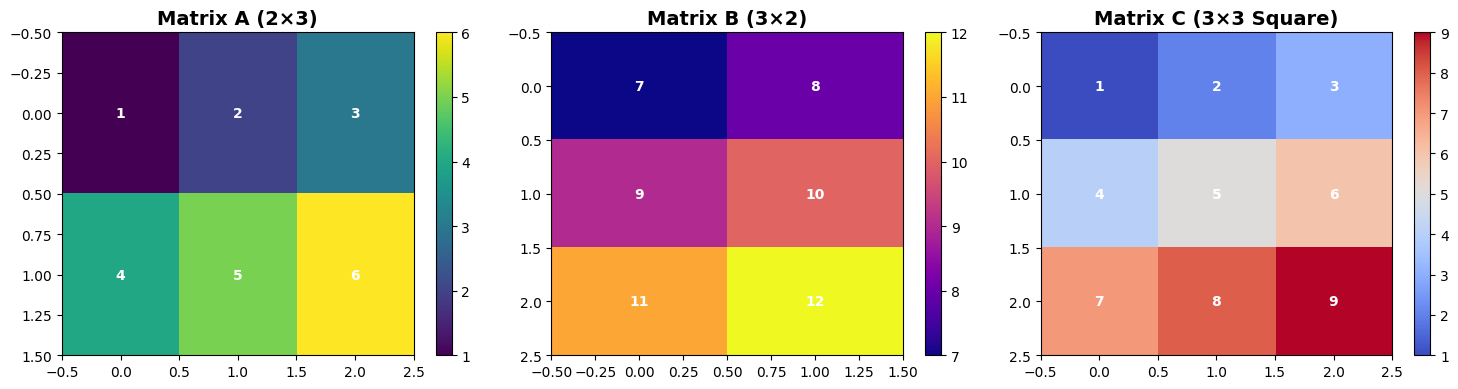

In [ ]:
# Create sample matrices
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

# Square matrix
C = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print(f"Matrix A (2×3):\n{A}")
print(f"\nShape of A: {A.shape}")
print(f"\nMatrix B (3×2):\n{B}")
print(f"\nMatrix C (3×3 - Square):\n{C}")

# Visualize matrices as heatmaps
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Matrix A
im1 = axes[0].imshow(A, cmap='viridis', aspect='auto')
axes[0].set_title('Matrix A (2×3)', fontsize=14, fontweight='bold')
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        axes[0].text(j, i, f'{A[i,j]}', ha='center', va='center', color='white', fontweight='bold')
plt.colorbar(im1, ax=axes[0])

# Matrix B
im2 = axes[1].imshow(B, cmap='plasma', aspect='auto')
axes[1].set_title('Matrix B (3×2)', fontsize=14, fontweight='bold')
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        axes[1].text(j, i, f'{B[i,j]}', ha='center', va='center', color='white', fontweight='bold')
plt.colorbar(im2, ax=axes[1])

# Matrix C
im3 = axes[2].imshow(C, cmap='coolwarm', aspect='auto')
axes[2].set_title('Matrix C (3×3 Square)', fontsize=14, fontweight='bold')
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        axes[2].text(j, i, f'{C[i,j]}', ha='center', va='center', color='white', fontweight='bold')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

## 2. ✖️ Matrix Multiplication: The Heart of Deep Learning

### Mathematical Definition
For matrices $\mathbf{A} \in \mathbb{R}^{m \times k}$ and $\mathbf{B} \in \mathbb{R}^{k \times n}$, their product $\mathbf{C} = \mathbf{AB}$ is:

$$c_{ij} = \sum_{p=1}^{k} a_{ip} \cdot b_{pj}$$

### Key Rules
1. **Dimension Compatibility**: $(m \times k) \times (k \times n) = (m \times n)$
2. **Not Commutative**: $\mathbf{AB} \neq \mathbf{BA}$ (generally)
3. **Associative**: $(\mathbf{AB})\mathbf{C} = \mathbf{A}(\mathbf{BC})$
4. **Distributive**: $\mathbf{A}(\mathbf{B} + \mathbf{C}) = \mathbf{AB} + \mathbf{AC}$

### ML Applications
- **Neural Networks**: $\mathbf{y} = \mathbf{Wx} + \mathbf{b}$
- **Linear Regression**: $\hat{\mathbf{y}} = \mathbf{X}\boldsymbol{\beta}$
- **Convolution**: Implemented as matrix multiplication
- **Attention**: $\text{Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V}) = \text{softmax}(\mathbf{QK}^T)\mathbf{V}$


In [ ]:
def visualize_matrix_multiplication(A, B):
    """Visualize matrix multiplication step by step"""

    # Check if multiplication is valid
    if A.shape[1] != B.shape[0]:
        print(f"❌ Invalid multiplication: {A.shape} × {B.shape}")
        return None

    # Perform multiplication
    C = np.dot(A, B)

    print(f"✅ Valid multiplication: {A.shape} × {B.shape} = {C.shape}")
    print(f"\nMatrix A ({A.shape[0]}×{A.shape[1]}):")
    print(A)
    print(f"\nMatrix B ({B.shape[0]}×{B.shape[1]}):")
    print(B)
    print(f"\nResult C = A × B ({C.shape[0]}×{C.shape[1]}):")
    print(C)

    # Show detailed computation for first element
    print(f"\n🔍 Detailed computation for C[0,0]:")
    computation = []
    for k in range(A.shape[1]):
        computation.append(f"{A[0,k]} × {B[k,0]}")
    print(f"C[0,0] = {' + '.join(computation)} = {C[0,0]}")

    return C

# Example 1: Compatible matrices
print("📝 Example 1: Compatible Matrices")
print("=" * 40)
A1 = np.array([[1, 2, 3],
               [4, 5, 6]])
B1 = np.array([[7, 8],
               [9, 10],
               [11, 12]])

C1 = visualize_matrix_multiplication(A1, B1)

print("\n" + "=" * 50)
print("📝 Example 2: Incompatible Matrices")
print("=" * 40)
A2 = np.array([[1, 2],
               [3, 4]])
B2 = np.array([[5, 6, 7],
               [8, 9, 10],
               [11, 12, 13]])

C2 = visualize_matrix_multiplication(A2, B2)

📝 Example 1: Compatible Matrices
✅ Valid multiplication: (2, 3) × (3, 2) = (2, 2)

Matrix A (2×3):
[[1 2 3]
 [4 5 6]]

Matrix B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]

Result C = A × B (2×2):
[[ 58  64]
 [139 154]]

🔍 Detailed computation for C[0,0]:
C[0,0] = 1 × 7 + 2 × 9 + 3 × 11 = 58

📝 Example 2: Incompatible Matrices
❌ Invalid multiplication: (2, 2) × (3, 3)


### 🎮 Interactive Matrix Multiplication Visualizer

In [ ]:
def create_interactive_multiplication():
    """Create interactive matrix multiplication visualization"""

    @interact(m=IntSlider(min=2, max=4, step=1, value=2, description='Rows A'),
              k=IntSlider(min=2, max=4, step=1, value=3, description='Cols A / Rows B'),
              n=IntSlider(min=2, max=4, step=1, value=2, description='Cols B'))
    def interactive_mult(m, k, n):
        # Generate random matrices
        A = np.random.randint(1, 10, size=(m, k))
        B = np.random.randint(1, 10, size=(k, n))
        C = np.dot(A, B)

        # Create visualization
        fig = make_subplots(
            rows=2, cols=3,
            subplot_titles=['Matrix A', 'Matrix B', 'Result C = A×B',
                           'A Visualization', 'B Visualization', 'C Visualization'],
            specs=[[{"type": "table"}, {"type": "table"}, {"type": "table"}],
                   [{"type": "xy"}, {"type": "xy"}, {"type": "xy"}]]
        )

        # Add tables for matrices
        fig.add_trace(go.Table(
            header=dict(values=[f'Col {i}' for i in range(k)]),
            cells=dict(values=[A[:, i] for i in range(k)])
        ), row=1, col=1)

        fig.add_trace(go.Table(
            header=dict(values=[f'Col {i}' for i in range(n)]),
            cells=dict(values=[B[:, i] for i in range(n)])
        ), row=1, col=2)

        fig.add_trace(go.Table(
            header=dict(values=[f'Col {i}' for i in range(n)]),
            cells=dict(values=[C[:, i] for i in range(n)])
        ), row=1, col=3)

        # Add heatmaps (fixed colorscale names)
        fig.add_trace(go.Heatmap(z=A, colorscale='viridis', showscale=False), row=2, col=1)
        fig.add_trace(go.Heatmap(z=B, colorscale='plasma', showscale=False), row=2, col=2)
        fig.add_trace(go.Heatmap(z=C, colorscale='rdbu', showscale=False), row=2, col=3)

        fig.update_layout(
            title=f"Matrix Multiplication: ({m}×{k}) × ({k}×{n}) = ({m}×{n})",
            height=600
        )

        fig.show()

        # Show computation details
        print(f"\n🔢 Matrix Dimensions:")
        print(f"A: {A.shape}, B: {B.shape}, C: {C.shape}")
        print(f"\n💡 Memory Usage (elements):")
        print(f"A: {A.size}, B: {B.size}, C: {C.size}")
        print(f"\n⚡ Computational Complexity: O({m}×{k}×{n}) = O({m*k*n})")

create_interactive_multiplication()

interactive(children=(IntSlider(value=2, description='Rows A', max=4, min=2), IntSlider(value=3, description='…

## 3. 🎭 Special Matrices and Their Properties

### Identity Matrix (I)
The identity matrix is the multiplicative identity for matrices:
$$\mathbf{I}_n = \begin{bmatrix} 1 & 0 & \cdots & 0 \\ 0 & 1 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & 1 \end{bmatrix}$$

**Property**: $\mathbf{AI} = \mathbf{IA} = \mathbf{A}$

### Transpose ($\mathbf{A}^T$)
The transpose flips a matrix over its main diagonal:
$$[\mathbf{A}^T]_{ij} = [\mathbf{A}]_{ji}$$

**Properties**:
- $(\mathbf{A}^T)^T = \mathbf{A}$
- $(\mathbf{AB})^T = \mathbf{B}^T\mathbf{A}^T$

### Symmetric Matrix
A matrix where $\mathbf{A} = \mathbf{A}^T$
- **ML Relevance**: Covariance matrices, Hessians

### Orthogonal Matrix
A matrix where $\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$
- **ML Relevance**: Rotations, PCA components


### 🎭 Special Matrices Demonstration

In [ ]:
# Identity Matrix
I3 = np.eye(3)
print("🆔 Identity Matrix (3×3):")
print(I3)

# Test identity property
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

AI = np.dot(A, I3)
IA = np.dot(I3, A)

print(f"\n✅ Identity Property Check:")
print(f"A × I = A? {np.allclose(A, AI)}")
print(f"I × A = A? {np.allclose(A, IA)}")

# Transpose
B = np.array([[1, 2, 3],
              [4, 5, 6]])
B_T = B.T

print(f"\n🔄 Matrix B (2×3):")
print(B)
print(f"\nTranspose B^T (3×2):")
print(B_T)

# Symmetric Matrix
S = np.array([[1, 2, 3],
              [2, 4, 5],
              [3, 5, 6]])

print(f"\n🪞 Symmetric Matrix S:")
print(S)
print(f"Is S symmetric? {np.allclose(S, S.T)}")

# Create orthogonal matrix (rotation)
theta = np.pi/4  # 45 degrees
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

print(f"\n🔄 Rotation Matrix R (θ=45°):")
print(R)
print(f"R^T × R = I? {np.allclose(np.dot(R.T, R), np.eye(2))}")
print(f"det(R) = {np.linalg.det(R):.6f} (should be ±1)")

🆔 Identity Matrix (3×3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

✅ Identity Property Check:
A × I = A? True
I × A = A? True

🔄 Matrix B (2×3):
[[1 2 3]
 [4 5 6]]

Transpose B^T (3×2):
[[1 4]
 [2 5]
 [3 6]]

🪞 Symmetric Matrix S:
[[1 2 3]
 [2 4 5]
 [3 5 6]]
Is S symmetric? True

🔄 Rotation Matrix R (θ=45°):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
R^T × R = I? True
det(R) = 1.000000 (should be ±1)


### 🎨 Visualizing Matrix Transformations

In [ ]:
def visualize_2d_transformations():
    """Visualize 2D matrix transformations"""

    # Different transformation matrices
    transformations = {
        'Identity': np.array([[1, 0], [0, 1]]),
        'Scale (2x)': np.array([[2, 0], [0, 2]]),
        'Rotation (45°)': np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                                    [np.sin(np.pi/4), np.cos(np.pi/4)]]),
        'Shear': np.array([[1, 0.5], [0, 1]]),
        'Reflection (x-axis)': np.array([[1, 0], [0, -1]])
    }

    # Create subplot for all transformations
    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=list(transformations.keys()),
        specs=[[{"type": "xy"} for _ in range(3)] for _ in range(2)]
    )

    positions = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2)]

    for i, (name, matrix) in enumerate(transformations.items()):
        row, col = positions[i]

        # Create unit square
        square = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 1, 0]])

        # Apply transformation
        transformed = np.dot(matrix, square)

        # Add original square
        fig.add_trace(go.Scatter(
            x=square[0], y=square[1],
            mode='lines',
            name='Original' if i == 0 else None,
            line=dict(color='blue', width=2),
            showlegend=True if i == 0 else False
        ), row=row, col=col)

        # Add transformed square
        fig.add_trace(go.Scatter(
            x=transformed[0], y=transformed[1],
            mode='lines',
            name='Transformed' if i == 0 else None,
            line=dict(color='red', width=2),
            showlegend=True if i == 0 else False
        ), row=row, col=col)

        # Update axes
        fig.update_xaxes(range=[-3, 3], dtick=1, showgrid=True, row=row, col=col)
        fig.update_yaxes(range=[-3, 3], dtick=1, showgrid=True, row=row, col=col)

    fig.update_layout(
        title="2D Matrix Transformations",
        height=800,
        showlegend=True
    )

    fig.show()

    # Print transformation matrices
    print("🔢 Transformation Matrices:")
    for name, matrix in transformations.items():
        print(f"\n{name}:")
        print(matrix)
        print(f"Determinant: {np.linalg.det(matrix):.3f}")

visualize_2d_transformations()

🔢 Transformation Matrices:

Identity:
[[1 0]
 [0 1]]
Determinant: 1.000

Scale (2x):
[[2 0]
 [0 2]]
Determinant: 4.000

Rotation (45°):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Determinant: 1.000

Shear:
[[1.  0.5]
 [0.  1. ]]
Determinant: 1.000

Reflection (x-axis):
[[ 1  0]
 [ 0 -1]]
Determinant: -1.000


## 4. 🔢 Matrix Inverse and Determinant

### Matrix Inverse ($\mathbf{A}^{-1}$)
For a square matrix $\mathbf{A}$, its inverse $\mathbf{A}^{-1}$ satisfies:
$$\mathbf{A}\mathbf{A}^{-1} = \mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$$

**Conditions for Inverse**:
- Matrix must be square
- Matrix must be non-singular (det($\mathbf{A}$) ≠ 0)

**ML Applications**:
- Solving linear systems: $\mathbf{Ax} = \mathbf{b} \Rightarrow \mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$
- Normal equations: $\boldsymbol{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

### Determinant (det($\mathbf{A}$))
The determinant is a scalar value that provides important information about the matrix:

For 2×2 matrix: $\det\begin{bmatrix} a & b \\ c & d \end{bmatrix} = ad - bc$

**Geometric Interpretation**:
- Volume scaling factor of the transformation
- Zero determinant = matrix is singular (not invertible)
- Negative determinant = orientation is flipped

### 🔢 Matrix Inverse and Determinant Examples

In [ ]:
# Example matrices
A = np.array([[2, 1],
              [1, 1]])

B = np.array([[1, 2],
              [2, 4]])  # Singular matrix

print("📊 Matrix Operations Examples")
print("=" * 40)

# Matrix A (invertible)
print(f"Matrix A:\n{A}")
det_A = np.linalg.det(A)
print(f"det(A) = {det_A:.3f}")

if det_A != 0:
    A_inv = np.linalg.inv(A)
    print(f"A^(-1):\n{A_inv}")

    # Verify inverse
    identity_check = np.dot(A, A_inv)
    print(f"A × A^(-1) = \n{identity_check}")
    print(f"Is A × A^(-1) = I? {np.allclose(identity_check, np.eye(2))}")

print(f"\n" + "=" * 40)

# Matrix B (singular)
print(f"Matrix B (Singular):\n{B}")
det_B = np.linalg.det(B)
print(f"det(B) = {det_B:.3f}")

if abs(det_B) < 1e-10:
    print("❌ Matrix B is singular (not invertible)")
    print("Reason: det(B) = 0")

# Demonstrate condition number
print(f"\n📏 Condition Numbers:")
cond_A = np.linalg.cond(A)
print(f"cond(A) = {cond_A:.3f} (well-conditioned if < 100)")

# Ill-conditioned matrix example
C = np.array([[1, 1],
              [1, 1.0001]])
cond_C = np.linalg.cond(C)
print(f"cond(C) = {cond_C:.1e} (ill-conditioned!)")

📊 Matrix Operations Examples
Matrix A:
[[2 1]
 [1 1]]
det(A) = 1.000
A^(-1):
[[ 1. -1.]
 [-1.  2.]]
A × A^(-1) = 
[[1. 0.]
 [0. 1.]]
Is A × A^(-1) = I? True

Matrix B (Singular):
[[1 2]
 [2 4]]
det(B) = 0.000
❌ Matrix B is singular (not invertible)
Reason: det(B) = 0

📏 Condition Numbers:
cond(A) = 6.854 (well-conditioned if < 100)
cond(C) = 4.0e+04 (ill-conditioned!)


### 🎯 Interactive Determinant Visualizer

In [ ]:
def interactive_determinant_visualizer():
    """Interactive visualization of how determinant affects transformations"""

    @interact(a=FloatSlider(min=-3, max=3, step=0.1, value=1, description='a'),
              b=FloatSlider(min=-3, max=3, step=0.1, value=0, description='b'),
              c=FloatSlider(min=-3, max=3, step=0.1, value=0, description='c'),
              d=FloatSlider(min=-3, max=3, step=0.1, value=1, description='d'))
    def visualize_determinant(a, b, c, d):
        # Create transformation matrix
        T = np.array([[a, b], [c, d]])
        det_T = np.linalg.det(T)

        # Create unit square
        square = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 1, 0]])

        # Apply transformation
        transformed = np.dot(T, square)

        # Create visualization
        fig = go.Figure()

        # Original square
        fig.add_trace(go.Scatter(
            x=square[0], y=square[1],
            mode='lines+markers',
            name='Original (Area = 1)',
            line=dict(color='blue', width=3),
            marker=dict(size=8)
        ))

        # Transformed square
        fig.add_trace(go.Scatter(
            x=transformed[0], y=transformed[1],
            mode='lines+markers',
            name=f'Transformed (Area = |{det_T:.3f}|)',
            line=dict(color='red', width=3),
            marker=dict(size=8)
        ))

        # Styling
        fig.update_layout(
            title=f"Matrix [[{a:.1f}, {b:.1f}], [{c:.1f}, {d:.1f}]] | det = {det_T:.3f}",
            xaxis=dict(range=[-5, 5], dtick=1, showgrid=True),
            yaxis=dict(range=[-5, 5], dtick=1, showgrid=True),
            showlegend=True,
            width=600,
            height=600
        )

        fig.show()

        # Analysis
        print(f"🔍 Matrix Analysis:")
        print(f"Matrix: [[{a:.1f}, {b:.1f}], [{c:.1f}, {d:.1f}]]")
        print(f"Determinant: {det_T:.3f}")
        print(f"Area scaling factor: {abs(det_T):.3f}")

        if abs(det_T) < 1e-10:
            print("⚠️  Matrix is singular (not invertible)")
        elif det_T < 0:
            print("🔄 Transformation flips orientation")
        else:
            print("✅ Transformation preserves orientation")

interactive_determinant_visualizer()

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

## 5. 🧠 ML Applications: Neural Network Forward Pass

### Neural Network Mathematics
A simple neural network layer performs:
$$\mathbf{y} = \sigma(\mathbf{Wx} + \mathbf{b})$$

Where:
- $\mathbf{W}$ is the weight matrix
- $\mathbf{x}$ is the input vector
- $\mathbf{b}$ is the bias vector
- $\sigma$ is the activation function

### 🧠 Neural Network Implementation

In [ ]:
def neural_network_demo():
    """Demonstrate matrix operations in neural networks"""

    # Network architecture: 3 → 4 → 2
    input_size = 3
    hidden_size = 4
    output_size = 2

    # Initialize weights and biases
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.1
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.1
    b2 = np.zeros((output_size, 1))

    # Sample input
    x = np.array([[1.0], [0.5], [-0.2]])

    print("🧠 Neural Network Forward Pass")
    print("=" * 40)
    print(f"Network: {input_size} → {hidden_size} → {output_size}")

    print(f"\nInput x ({input_size}×1):")
    print(x.flatten())

    print(f"\nWeight W1 ({hidden_size}×{input_size}):")
    print(W1)

    print(f"\nBias b1 ({hidden_size}×1):")
    print(b1.flatten())

    # Forward pass - Layer 1
    z1 = np.dot(W1, x) + b1
    a1 = np.maximum(0, z1)  # ReLU activation

    print(f"\nHidden layer output a1 = ReLU(W1*x + b1):")
    print(a1.flatten())

    # Forward pass - Layer 2
    z2 = np.dot(W2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation

    print(f"\nOutput layer z2 = W2*a1 + b2:")
    print(z2.flatten())

    print(f"\nFinal output a2 = sigmoid(z2):")
    print(a2.flatten())

    # Visualize network
    fig = go.Figure()

    # Input layer
    for i in range(input_size):
        fig.add_trace(go.Scatter(
            x=[0], y=[i], mode='markers+text',
            marker=dict(size=20, color='lightblue'),
            text=[f'x{i+1}'], textposition='middle center',
            showlegend=False
        ))

    # Hidden layer
    for i in range(hidden_size):
        fig.add_trace(go.Scatter(
            x=[1], y=[i-0.5], mode='markers+text',
            marker=dict(size=20, color='lightgreen'),
            text=[f'h{i+1}'], textposition='middle center',
            showlegend=False
        ))

    # Output layer
    for i in range(output_size):
        fig.add_trace(go.Scatter(
            x=[2], y=[i+0.5], mode='markers+text',
            marker=dict(size=20, color='lightcoral'),
            text=[f'o{i+1}'], textposition='middle center',
            showlegend=False
        ))

    # Add connections (simplified)
    for i in range(input_size):
        for j in range(hidden_size):
            fig.add_shape(type="line",
                x0=0, y0=i, x1=1, y1=j-0.5,
                line=dict(color="gray", width=1))

    for i in range(hidden_size):
        for j in range(output_size):
            fig.add_shape(type="line",
                x0=1, y0=i-0.5, x1=2, y1=j+0.5,
                line=dict(color="gray", width=1))

    fig.update_layout(
        title="Neural Network Architecture (3→4→2)",
        xaxis=dict(range=[-0.5, 2.5], showgrid=False, zeroline=False),
        yaxis=dict(range=[-1, 4], showgrid=False, zeroline=False),
        showlegend=False,
        width=600,
        height=400
    )

    fig.show()

neural_network_demo()

🧠 Neural Network Forward Pass
Network: 3 → 4 → 2

Input x (3×1):
[ 1.   0.5 -0.2]

Weight W1 (4×3):
[[ 0.04967142 -0.01382643  0.06476885]
 [ 0.15230299 -0.02341534 -0.0234137 ]
 [ 0.15792128  0.07674347 -0.04694744]
 [ 0.054256   -0.04634177 -0.04657298]]

Bias b1 (4×1):
[0. 0. 0. 0.]

Hidden layer output a1 = ReLU(W1*x + b1):
[0.02980443 0.14527806 0.20568251 0.04039971]

Output layer z2 = W2*a1 + b2:
[-0.06482478 -0.02283549]

Final output a2 = sigmoid(z2):
[0.48379948 0.49429137]


### 📊 Batch Processing with Matrix Operations

In [ ]:
def batch_processing_demo():
    """Enhanced batch processing demo with performance analysis"""

    # Multiple batch sizes for comparison
    batch_sizes = [1, 8, 32, 128]
    input_size = 784  # 28x28 image (MNIST-like)
    hidden_size = 256

    print("🚀 Batch Processing Performance Analysis")
    print("=" * 50)

    # Initialize weights once
    W = np.random.randn(hidden_size, input_size) * 0.01
    b = np.random.randn(hidden_size, 1) * 0.01

    results = []

    for batch_size in batch_sizes:
        # Generate batch data
        X_batch = np.random.randn(input_size, batch_size)

        # Measure time (approximate)
        operations = hidden_size * input_size * batch_size

        # Forward pass
        Z_batch = np.dot(W, X_batch) + b
        A_batch = np.maximum(0, Z_batch)  # ReLU

        # Calculate efficiency metrics
        memory_usage = X_batch.nbytes + Z_batch.nbytes + A_batch.nbytes
        ops_per_sample = operations / batch_size

        results.append({
            'batch_size': batch_size,
            'operations': operations,
            'ops_per_sample': ops_per_sample,
            'memory_mb': memory_usage / (1024**2),
            'output_shape': Z_batch.shape
        })

        print(f"\nBatch Size {batch_size:3d}:")
        print(f"  Operations: {operations:,}")
        print(f"  Memory: {memory_usage/(1024**2):.2f} MB")
        print(f"  Output: {Z_batch.shape}")

    # Visualize small example
    small_batch = np.random.randn(4, 3)  # 4 features, 3 samples
    small_W = np.random.randn(2, 4)      # 2 hidden units
    small_result = np.dot(small_W, small_batch)

    # Create visualization
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=['Weights W (2×4)', 'Input Batch X (4×3)', 'Output Z (2×3)'],
        specs=[[{"type": "xy"}, {"type": "xy"}, {"type": "xy"}]]
    )

    # Add heatmaps with correct colorscale names
    fig.add_trace(go.Heatmap(z=small_W, colorscale='viridis',
                            showscale=True, name='Weights'), row=1, col=1)
    fig.add_trace(go.Heatmap(z=small_batch, colorscale='plasma',
                            showscale=True, name='Input'), row=1, col=2)
    fig.add_trace(go.Heatmap(z=small_result, colorscale='rdbu',
                            showscale=True, name='Output'), row=1, col=3)

    fig.update_layout(
        title="Neural Network Batch Processing: W × X = Z",
        height=400,
        showlegend=False
    )
    fig.show()

    return results

# Run enhanced demo
performance_results = batch_processing_demo()

🚀 Batch Processing Performance Analysis

Batch Size   1:
  Operations: 200,704
  Memory: 0.01 MB
  Output: (256, 1)

Batch Size   8:
  Operations: 1,605,632
  Memory: 0.08 MB
  Output: (256, 8)

Batch Size  32:
  Operations: 6,422,528
  Memory: 0.32 MB
  Output: (256, 32)

Batch Size 128:
  Operations: 25,690,112
  Memory: 1.27 MB
  Output: (256, 128)


## 6. 🔧 Practical Exercises

### Exercise 1: Matrix Chain Multiplication
Given matrices A(2×3), B(3×4), C(4×2), find the most efficient way to compute ABC.


In [ ]:
def matrix_chain_multiplication():
    """Demonstrate matrix chain multiplication optimization"""

    # Define matrices
    A = np.random.randn(2, 3)
    B = np.random.randn(3, 4)
    C = np.random.randn(4, 2)

    print("🔗 Matrix Chain Multiplication")
    print("=" * 35)
    print(f"A: {A.shape}, B: {B.shape}, C: {C.shape}")

    # Method 1: (AB)C
    print(f"\nMethod 1: (AB)C")
    AB = np.dot(A, B)  # 2×3 × 3×4 = 2×4 (24 ops)
    result1 = np.dot(AB, C)  # 2×4 × 4×2 = 2×2 (16 ops)
    ops1 = 2*3*4 + 2*4*2  # Total: 40 operations
    print(f"Operations: {2*3*4} + {2*4*2} = {ops1}")

    # Method 2: A(BC)
    print(f"\nMethod 2: A(BC)")
    BC = np.dot(B, C)  # 3×4 × 4×2 = 3×2 (24 ops)
    result2 = np.dot(A, BC)  # 2×3 × 3×2 = 2×2 (12 ops)
    ops2 = 3*4*2 + 2*3*2  # Total: 36 operations
    print(f"Operations: {3*4*2} + {2*3*2} = {ops2}")

    # Verify results are the same
    print(f"\nResults are identical: {np.allclose(result1, result2)}")
    print(f"More efficient method: {'Method 2' if ops2 < ops1 else 'Method 1'}")
    print(f"Savings: {abs(ops1 - ops2)} operations ({abs(ops1-ops2)/max(ops1,ops2)*100:.1f}%)")

matrix_chain_multiplication()

🔗 Matrix Chain Multiplication
A: (2, 3), B: (3, 4), C: (4, 2)

Method 1: (AB)C
Operations: 24 + 16 = 40

Method 2: A(BC)
Operations: 24 + 12 = 36

Results are identical: True
More efficient method: Method 2
Savings: 4 operations (10.0%)


### Exercise 2: Solving Linear Systems

In [ ]:
def linear_systems_demo():
    """Solve linear systems using matrix operations"""

    print("📐 Solving Linear Systems")
    print("=" * 30)

    # System: 2x + 3y = 7
    #         4x + y = 6
    A = np.array([[2, 3],
                  [4, 1]])
    b = np.array([[7],
                  [6]])

    print("System of equations:")
    print("2x + 3y = 7")
    print("4x +  y = 6")

    print(f"\nMatrix form Ax = b:")
    print(f"A = \n{A}")
    print(f"b = \n{b.flatten()}")

    # Method 1: Matrix inverse
    if np.linalg.det(A) != 0:
        A_inv = np.linalg.inv(A)
        x1 = np.dot(A_inv, b)
        print(f"\nMethod 1: x = A^(-1)b")
        print(f"x = {x1.flatten()}")

    # Method 2: NumPy solve (more efficient)
    x2 = np.linalg.solve(A, b)
    print(f"\nMethod 2: np.linalg.solve(A, b)")
    print(f"x = {x2.flatten()}")

    # Verify solution
    verification = np.dot(A, x2)
    print(f"\nVerification: Ax = {verification.flatten()}")
    print(f"Original b:        {b.flatten()}")
    print(f"Solution correct: {np.allclose(verification, b)}")

    # Visualize graphically
    x_vals = np.linspace(-2, 4, 100)
    y1_vals = (7 - 2*x_vals) / 3  # From 2x + 3y = 7
    y2_vals = 6 - 4*x_vals        # From 4x + y = 6

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=x_vals, y=y1_vals,
        mode='lines',
        name='2x + 3y = 7',
        line=dict(color='blue', width=3)
    ))

    fig.add_trace(go.Scatter(
        x=x_vals, y=y2_vals,
        mode='lines',
        name='4x + y = 6',
        line=dict(color='red', width=3)
    ))

    # Mark solution point
    fig.add_trace(go.Scatter(
        x=[x2[0][0]], y=[x2[1][0]],
        mode='markers',
        name=f'Solution ({x2[0][0]:.2f}, {x2[1][0]:.2f})',
        marker=dict(size=15, color='green')
    ))

    fig.update_layout(
        title="Linear System Solution",
        xaxis_title="x",
        yaxis_title="y",
        xaxis=dict(range=[-1, 3]),
        yaxis=dict(range=[-2, 4]),
        showlegend=True
    )

    fig.show()

linear_systems_demo()

📐 Solving Linear Systems
System of equations:
2x + 3y = 7
4x +  y = 6

Matrix form Ax = b:
A = 
[[2 3]
 [4 1]]
b = 
[7 6]

Method 1: x = A^(-1)b
x = [1.1 1.6]

Method 2: np.linalg.solve(A, b)
x = [1.1 1.6]

Verification: Ax = [7. 6.]
Original b:        [7 6]
Solution correct: True


### Exercise 3: Principal Component Analysis (PCA) Matrix Operations


In [ ]:
def pca_matrix_demo():
    """Demonstrate PCA using matrix operations"""

    print("🎯 Principal Component Analysis (PCA)")
    print("=" * 40)

    # Generate sample data
    np.random.seed(42)
    n_samples = 100

    # Original correlated data
    X = np.random.randn(n_samples, 2)
    X[:, 1] = 0.5 * X[:, 0] + 0.5 * X[:, 1]  # Create correlation

    print(f"Original data shape: {X.shape}")

    # Step 1: Center the data
    X_centered = X - np.mean(X, axis=0)
    print(f"Data mean: {np.mean(X, axis=0)}")
    print(f"Centered data mean: {np.mean(X_centered, axis=0)}")

    # Step 2: Compute covariance matrix
    C = np.cov(X_centered.T)
    print(f"\nCovariance matrix C:")
    print(C)
    print(f"C is symmetric: {np.allclose(C, C.T)}")

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(C)

    print(f"\nEigenvalues: {eigenvalues}")
    print(f"Eigenvectors:\n{eigenvectors}")

    # Sort by eigenvalue (descending)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    print(f"\nSorted eigenvalues: {eigenvalues}")
    print(f"Explained variance ratio: {eigenvalues / np.sum(eigenvalues)}")

    # Step 4: Project data onto principal components
    X_pca = np.dot(X_centered, eigenvectors)

    # Visualize results
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=['Original Data', 'PCA Transformed Data']
    )

    # Original data
    fig.add_trace(go.Scatter(
        x=X[:, 0], y=X[:, 1],
        mode='markers',
        name='Original',
        marker=dict(color='blue', opacity=0.6)
    ), row=1, col=1)

    # Add eigenvectors as arrows
    center = np.mean(X, axis=0)
    scale = 2 * np.sqrt(eigenvalues)

    for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        fig.add_annotation(
            x=center[0], y=center[1],
            ax=center[0] + scale[i] * vec[0],
            ay=center[1] + scale[i] * vec[1],
            xref='x', yref='y',
            axref='x', ayref='y',
            arrowhead=2,
            arrowsize=1.5,
            arrowwidth=3,
            arrowcolor='red' if i == 0 else 'orange',
            row=1, col=1
        )

    # PCA transformed data
    fig.add_trace(go.Scatter(
        x=X_pca[:, 0], y=X_pca[:, 1],
        mode='markers',
        name='PCA Transformed',
        marker=dict(color='green', opacity=0.6)
    ), row=1, col=2)

    fig.update_layout(
        title="PCA Analysis using Matrix Operations",
        height=400,
        showlegend=True
    )

    fig.show()

    # Matrix operation summary
    print(f"\n📊 PCA Matrix Operations Summary:")
    print(f"1. Centering: X_centered = X - mean(X)")
    print(f"2. Covariance: C = cov(X_centered.T)")
    print(f"3. Eigendecomposition: C = V Λ V^T")
    print(f"4. Projection: X_pca = X_centered @ V")

    return X, X_pca, eigenvalues, eigenvectors

# Run PCA demo
X_orig, X_pca, vals, vecs = pca_matrix_demo()

🎯 Principal Component Analysis (PCA)
Original data shape: (100, 2)
Data mean: [-0.11556425 -0.04077097]
Centered data mean: [-6.49480469e-17  1.77635684e-17]

Covariance matrix C:
[[0.73327232 0.38045926]
 [0.38045926 0.44657079]]
C is symmetric: True

Eigenvalues: [0.99649097 0.18335213]
Eigenvectors:
[[ 0.82237041 -0.56895246]
 [ 0.56895246  0.82237041]]

Sorted eigenvalues: [0.99649097 0.18335213]
Explained variance ratio: [0.84459617 0.15540383]



📊 PCA Matrix Operations Summary:
1. Centering: X_centered = X - mean(X)
2. Covariance: C = cov(X_centered.T)
3. Eigendecomposition: C = V Λ V^T
4. Projection: X_pca = X_centered @ V


## 7. 🎓 Key Takeaways and Next Steps

### 🎯 What You've Learned

1. **Matrix Fundamentals**
   - Matrix representation and properties
   - Shape compatibility and operations

2. **Matrix Multiplication**
   - Computational rules and complexity
   - Geometric interpretation
   - Applications in neural networks

3. **Special Matrices**
   - Identity, transpose, symmetric, orthogonal
   - Their unique properties and ML applications

4. **Matrix Inverse and Determinant**
   - When matrices are invertible
   - Geometric meaning of determinant
   - Condition numbers and stability

5. **Practical Applications**
   - Neural network forward pass
   - Linear system solving
   - PCA and dimensionality reduction

### 🎯 Next Steps

1. **Practice Implementation**: Code these operations from scratch
2. **Study Applications**: Explore how they're used in popular frameworks
3. **Solve Problems**: Work through ML algorithm implementations
4. **Build Projects**: Create video processing applications using these concepts
